In [1]:
import os
%pwd

'/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/facial_expression_detection/research'

In [2]:
os.chdir('../')
%pwd

'/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/facial_expression_detection'

In [1]:
!wget 'https://drive.usercontent.google.com/download?id=184K8sLVcL_fq76pA2o8Bg4BthNLcwUel&export=download&authuser=0&confirm=t' -O labels_and_dataset.zip

--2024-10-26 00:17:16--  https://drive.usercontent.google.com/download?id=184K8sLVcL_fq76pA2o8Bg4BthNLcwUel&export=download&authuser=0&confirm=t
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.208.129, 2a00:1450:400d:805::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.208.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27388816 (26M) [application/octet-stream]
Saving to: ‘labels_and_dataset.zip’

labels_and_dataset. 100%[===================>]  26,12M  27,5MB/s    in 1,0s    

2024-10-26 00:17:19 (27,5 MB/s) - ‘labels_and_dataset.zip’ saved [27388816/27388816]



In [54]:
import pandas as pd
from src.detmood.constant import MOOD_DICT

df = pd.read_csv('artifacts/data_ingestion/labels.csv')

In [55]:
MOOD_DICT

{'sad': 0,
 'happy': 1,
 'surprised': 2,
 'anger': 3,
 'fear': 4,
 'disgust': 5,
 'neutral': 6}

In [52]:
df['label'][5]

'sad'

In [53]:
# df['label_ind'] = 0
for ind in df.index:
    df['label'][ind] = MOOD_DICT[df['label'][ind]]

df.head()

/tmp/ipykernel_7057/4290836331.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['label'][ind] = MOOD_DICT[df['label'][ind]]


,image,label
0,00001.jpg,0
1,00002.jpg,0
2,00004.jpg,1
3,00005.jpg,0
4,00006.jpg,2


In [ ]:
os.listdir('artifacts/data_ingestion/dataset')

In [8]:
import cv2

In [24]:
img = cv2.imread('artifacts/data_ingestion/dataset/00001.jpg')
# im_eq = cv2.equalizeHist(img[:,:,1])
im_filt = cv2.medianBlur(img, 3)

In [10]:
import matplotlib.pyplot as plt

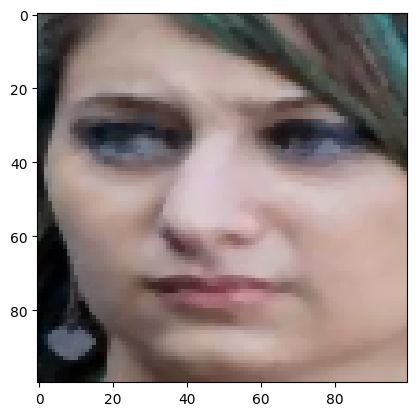

In [42]:
img_rgb = cv2.cvtColor(im_filt, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap="gray")

In [31]:
img[:,:,0]

array([[ 73, 103,  76, ...,  27,  77,  64],
       [125,  92,  72, ...,  55,  93,  51],
       [ 58,  86,  82, ...,  64,  80,  40],
       ...,
       [ 22,  19,  17, ..., 155, 157, 158],
       [ 10,  15,  20, ..., 155, 158, 158],
       [ 12,  18,  24, ..., 156, 158, 158]], dtype=uint8)